In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

In [5]:
imt = pd.read_excel('imt_disease_done.xlsx')  #набор данных о анализах, имт и болезнях пациентов
imt

,Пол,Возраст,"Рост, см","Вес, кг",ИМТ,Классификация,"АЛТ, 1/л","АСТ, 1/л","Билирубин общий, мкмоль/л","Билирубин прямой (связанный), мкмоль/л",...,"ЛПВП, ммоль/л","Белок общий, г/л","Триглицериды, ммоль/л","Общий холестерин, ммоль/л",Индекс атерогенности,Гликированный гемоглобин (г/дл),ЧСС (уд/мин.),АДС(мм рт. ст),АДД(мм рт. ст),Заболевание
0,1,49.0,174,62,20.48,Нормальный,23.8,20.6,11.1,2.53,...,1.00,75.55,2.98,8.56,7.54,15.0,66,120,80,I10-I15
1,1,33.0,157,71,28.80,Избыточный вес,20.2,21.3,2.9,2.47,...,0.85,70.85,2.78,5.72,5.73,4.0,72,130,80,I20-I25
2,1,73.0,156,100,41.09,Ожирение III степени,74.8,43.5,12.0,3.80,...,1.03,79.61,1.71,7.52,6.30,4.0,72,130,80,I20-I25
3,0,34.0,160,68,26.56,Избыточный вес,18.5,17.7,16.1,4.64,...,1.23,80.12,1.70,5.33,3.33,15.0,72,130,80,I20-I25
4,1,43.0,198,110,28.06,Избыточный вес,22.1,20.5,14.9,2.40,...,1.33,78.18,0.95,9.76,6.34,5.0,66,120,80,I10-I15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1559,0,49.0,170,59,20.42,Нормальный,21.2,23.0,14.5,3.35,...,1.04,69.33,1.45,5.83,4.61,5.0,65,150,90,I10-I15
1560,1,53.0,169,96,33.61,Ожирение I степени,18.9,25.2,21.0,4.06,...,0.97,81.47,4.59,6.73,5.94,5.0,80,180,100,I10-I15
1561,1,82.0,193,78,20.94,Нормальный,18.4,23.6,14.6,2.36,...,1.54,78.36,0.92,7.83,4.08,5.0,69,140,90,I10-I15
1562,0,45.0,171,69,23.60,Нормальный,58.5,47.9,7.4,1.84,...,2.15,79.63,0.96,6.86,2.19,4.0,76,160,80,I10-I15


In [6]:
imt.describe() #исследование количественных признаков

,Пол,Возраст,"Рост, см","Вес, кг",ИМТ,"АЛТ, 1/л","АСТ, 1/л","Билирубин общий, мкмоль/л","Билирубин прямой (связанный), мкмоль/л","Глюкоза, ммоль/л",...,"ЛПНП, ммоль/л","ЛПВП, ммоль/л","Белок общий, г/л","Триглицериды, ммоль/л","Общий холестерин, ммоль/л",Индекс атерогенности,Гликированный гемоглобин (г/дл),ЧСС (уд/мин.),АДС(мм рт. ст),АДД(мм рт. ст)
count,1564.000000,1562.000000,1564.000000,1564.000000,1563.000000,1564.000000,1564.000000,1564.000000,1564.000000,1564.000000,...,1564.000000,1564.000000,1564.000000,1564.000000,1564.000000,1564.000000,1564.000000,1564.000000,1564.000000,1564.000000
mean,0.627238,51.172215,172.656010,83.043478,28.180653,28.503172,24.564052,15.031308,3.584274,5.583764,...,3.324277,1.410729,73.518306,1.359254,5.584501,3.367959,8.184565,77.448849,130.597826,84.275575
std,0.483694,11.428094,13.462655,18.993332,7.845420,25.479031,20.155932,9.890355,1.983199,2.976492,...,2.268702,1.790053,10.483407,0.956554,2.242340,1.565864,7.411257,152.661093,19.833053,11.529933
min,0.000000,20.000000,0.000000,36.000000,12.630000,3.250000,4.890000,0.000000,0.080000,0.000000,...,0.000000,0.000000,0.000000,0.210000,1.640000,0.000000,4.000000,0.000000,0.000000,0.000000
25%,0.000000,43.000000,164.000000,68.000000,23.310000,15.975000,17.300000,9.600000,2.440000,4.810000,...,2.620000,1.060000,70.280000,0.770000,4.560000,2.270000,4.000000,66.000000,120.000000,80.000000
50%,1.000000,52.000000,173.000000,81.000000,27.470000,22.500000,21.000000,13.100000,3.140000,5.285000,...,3.230000,1.300000,74.605000,1.110000,5.470000,3.125000,5.000000,72.000000,127.000000,81.000000
75%,1.000000,60.000000,181.000000,97.000000,32.080000,32.600000,26.000000,17.700000,4.060000,5.850000,...,3.800000,1.580000,78.989510,1.650000,6.400000,4.172500,15.000000,80.000000,140.000000,90.000000
max,1.000000,124.000000,199.000000,164.000000,138.270000,342.000000,343.700000,143.000000,19.600000,78.600000,...,82.422041,68.870000,141.230000,11.300000,75.420000,17.400000,97.000000,6093.000000,260.000000,146.000000


In [7]:
imt.describe(include = ['O'])

,Классификация,Заболевание
count,1564,824
unique,6,3
top,Избыточный вес,I10-I15
freq,474,566


In [8]:
imt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1564 entries, 0 to 1563
Data columns (total 23 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Пол                                     1564 non-null   int64  
 1   Возраст                                 1562 non-null   float64
 2   Рост, см                                1564 non-null   int64  
 3   Вес, кг                                 1564 non-null   int64  
 4   ИМТ                                     1563 non-null   float64
 5   Классификация                           1564 non-null   object 
 6   АЛТ, 1/л                                1564 non-null   float64
 7   АСТ, 1/л                                1564 non-null   float64
 8   Билирубин общий, мкмоль/л               1564 non-null   float64
 9   Билирубин прямой (связанный), мкмоль/л  1564 non-null   float64
 10  Глюкоза, ммоль/л                        1564 non-null   floa

In [9]:
type("Заболевания")

str

In [10]:
imt

,Пол,Возраст,"Рост, см","Вес, кг",ИМТ,Классификация,"АЛТ, 1/л","АСТ, 1/л","Билирубин общий, мкмоль/л","Билирубин прямой (связанный), мкмоль/л",...,"ЛПВП, ммоль/л","Белок общий, г/л","Триглицериды, ммоль/л","Общий холестерин, ммоль/л",Индекс атерогенности,Гликированный гемоглобин (г/дл),ЧСС (уд/мин.),АДС(мм рт. ст),АДД(мм рт. ст),Заболевание
0,1,49.0,174,62,20.48,Нормальный,23.8,20.6,11.1,2.53,...,1.00,75.55,2.98,8.56,7.54,15.0,66,120,80,I10-I15
1,1,33.0,157,71,28.80,Избыточный вес,20.2,21.3,2.9,2.47,...,0.85,70.85,2.78,5.72,5.73,4.0,72,130,80,I20-I25
2,1,73.0,156,100,41.09,Ожирение III степени,74.8,43.5,12.0,3.80,...,1.03,79.61,1.71,7.52,6.30,4.0,72,130,80,I20-I25
3,0,34.0,160,68,26.56,Избыточный вес,18.5,17.7,16.1,4.64,...,1.23,80.12,1.70,5.33,3.33,15.0,72,130,80,I20-I25
4,1,43.0,198,110,28.06,Избыточный вес,22.1,20.5,14.9,2.40,...,1.33,78.18,0.95,9.76,6.34,5.0,66,120,80,I10-I15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1559,0,49.0,170,59,20.42,Нормальный,21.2,23.0,14.5,3.35,...,1.04,69.33,1.45,5.83,4.61,5.0,65,150,90,I10-I15
1560,1,53.0,169,96,33.61,Ожирение I степени,18.9,25.2,21.0,4.06,...,0.97,81.47,4.59,6.73,5.94,5.0,80,180,100,I10-I15
1561,1,82.0,193,78,20.94,Нормальный,18.4,23.6,14.6,2.36,...,1.54,78.36,0.92,7.83,4.08,5.0,69,140,90,I10-I15
1562,0,45.0,171,69,23.60,Нормальный,58.5,47.9,7.4,1.84,...,2.15,79.63,0.96,6.86,2.19,4.0,76,160,80,I10-I15


In [11]:
def calculate_bmi(weight, height):
    if pd.isna(weight) or pd.isna(height):
        return None
    try:
        return round(weight / (height / 100) ** 2, 2)
    except ZeroDivisionError:
        print(f"Ошибка: Рост равен 0 для строки {weight}, {height}")
        return None

# Применяем функцию calculate_bmi к каждой строке DataFrame
imt['ИМТ'] = imt.apply(lambda row: calculate_bmi(row['Вес, кг'], row['Рост, см']), axis=1)

# Проверяем результаты
print(imt[['Вес, кг', 'Рост, см', 'ИМТ']])

# Если хотим добавить классификацию по ИМТ
def classify_bmi(bmi_value):
    if bmi_value is None:
        return 'Недопределено'
    elif bmi_value < 18.5:
        return 'Недостаточный'
    elif bmi_value < 25:
        return 'Нормальный'
    elif bmi_value < 30:
        return 'Избыточный вес'
    elif bmi_value < 35:
        return 'Ожирение I степени'
    elif bmi_value < 40:
        return 'Ожирение II степени'
    else:
        return 'Ожирение III степени'

# Применяем классификацию к столбцу ИМТ в df_cleaned
imt['Классификация'] = imt['ИМТ'].apply(classify_bmi)

# Выводим результаты
imt[['Вес, кг', 'Рост, см', 'ИМТ', 'Классификация']]

Ошибка: Рост равен 0 для строки 68, 0
      Вес, кг  Рост, см    ИМТ
0          62       174  20.48
1          71       157  28.80
2         100       156  41.09
3          68       160  26.56
4         110       198  28.06
...       ...       ...    ...
1559       59       170  20.42
1560       96       169  33.61
1561       78       193  20.94
1562       69       171  23.60
1563       55       162  20.96

[1564 rows x 3 columns]


,"Вес, кг","Рост, см",ИМТ,Классификация
0,62,174,20.48,Нормальный
1,71,157,28.80,Избыточный вес
2,100,156,41.09,Ожирение III степени
3,68,160,26.56,Избыточный вес
4,110,198,28.06,Избыточный вес
...,...,...,...,...
1559,59,170,20.42,Нормальный
1560,96,169,33.61,Ожирение I степени
1561,78,193,20.94,Нормальный
1562,69,171,23.60,Нормальный


In [12]:
train = pd.read_excel("imt_disease_done.xlsx")

FileNotFoundError: [Errno 2] No such file or directory: 'test.xlsx'

In [10]:
train.head()

,Пол,Возраст,"Рост, см","Вес, кг",ИМТ,Классификация,"АЛТ, 1/л","АСТ, 1/л","Билирубин общий, мкмоль/л","Билирубин прямой (связанный), мкмоль/л",...,Hcy (Гомоцистеин),MCP-1,"VEGF, МЕ/мл","Интерлейкин 4, МЕ/мл",ЧСС (уд/мин.),АДС(мм рт. ст),АДД(мм рт. ст),Частота дыхательных движений,Гликированный гемоглобин (г/дл),Заболевание
0,0,42.0,187,87,24.88,Нормальный,48.0,37.0,36.0,39.00,...,11.84,462.0,144.0,9.54,77,122,82,12,5.5,I10-I15
1,0,55.0,155,76,31.63,Ожирение I степени,42.9,31.2,19.9,50.00,...,10.96,442.0,121.0,7.21,54,130,90,17,5.3,I20-I25
2,0,57.0,166,82,29.76,Избыточный вес,23.5,22.0,11.9,39.00,...,10.22,240.0,650.0,7.61,56,120,75,17,4.5,I20-I25
3,0,53.0,164,83,30.86,Ожирение I степени,104.1,72.7,9.6,37.00,...,5.54,230.0,304.0,5.38,54,115,78,17,5.1,I20-I25
4,0,55.0,180,101,31.17,Ожирение I степени,26.3,22.0,8.8,3.07,...,10.89,372.0,651.0,5.98,87,128,80,17,15.0,I10-I15


In [12]:
train['Заболевание'] = train['Заболевание'].fillna('Не выявлено')

In [13]:
test = pd.concat([train])

In [14]:
train['Заболевание'].unique()

array(['I10-I15', 'I20-I25', 'Не выявлено', 'I67.2'], dtype=object)

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [15]:
test.describe(include = ['O'])

,Классификация,Заболевание
count,1564,824
unique,6,3
top,Избыточный вес,I10-I15
freq,474,566


In [16]:
train.describe(include = ['O'])

,Классификация,Заболевание
count,1564,824
unique,6,3
top,Избыточный вес,I10-I15
freq,474,566


In [17]:
test['Заболевание']

0       I10-I15
1       I20-I25
2       I20-I25
3       I20-I25
4       I10-I15
         ...   
1559    I10-I15
1560    I10-I15
1561    I10-I15
1562    I10-I15
1563    I10-I15
Name: Заболевание, Length: 1564, dtype: object

In [18]:
disease =  test['Заболевание']
pd.get_dummies(disease, prefix="Заболевание")

,Заболевание_I10-I15,Заболевание_I20-I25,Заболевание_I67.2
0,True,False,False
1,False,True,False
2,False,True,False
3,False,True,False
4,True,False,False
...,...,...,...
1559,True,False,False
1560,True,False,False
1561,True,False,False
1562,True,False,False


In [19]:
test['Заболевание'].astype(str)


0       I10-I15
1       I20-I25
2       I20-I25
3       I20-I25
4       I10-I15
         ...   
1559    I10-I15
1560    I10-I15
1561    I10-I15
1562    I10-I15
1563    I10-I15
Name: Заболевание, Length: 1564, dtype: object

In [20]:
train['Заболевание'].astype(str)

0       I10-I15
1       I20-I25
2       I20-I25
3       I20-I25
4       I10-I15
         ...   
1559    I10-I15
1560    I10-I15
1561    I10-I15
1562    I10-I15
1563    I10-I15
Name: Заболевание, Length: 1564, dtype: object

In [22]:
labelencoder = LabelEncoder()

In [21]:
test['Заболевание'].unique()

array(['I10-I15', 'I20-I25', 'I67.2', nan], dtype=object)

In [22]:
test['Заболевание_переменная'] = pd.factorize(test['Заболевание'])[0]

print("\nДанные с числовой целевой переменной:")
test['Заболевание_переменная'].value_counts()


Данные с числовой целевой переменной:


Заболевание_переменная
-1    740
 0    566
 1    164
 2     94
Name: count, dtype: int64

In [24]:
class_imt = test['Классификация']
pd.get_dummies(class_imt , prefix="Классификация")

,Классификация_Избыточный вес,Классификация_Недостаточный,Классификация_Нормальный,Классификация_Ожирение I степени,Классификация_Ожирение II степени,Классификация_Ожирение III степени
0,False,False,True,False,False,False
1,True,False,False,False,False,False
2,False,False,False,False,False,True
3,True,False,False,False,False,False
4,True,False,False,False,False,False
...,...,...,...,...,...,...
1559,False,False,True,False,False,False
1560,False,False,False,True,False,False
1561,False,False,True,False,False,False
1562,False,False,True,False,False,False


In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X = test.drop(['Заболевание','Классификация','Заболевание_переменная'], axis=1)
y = test['Заболевание_переменная']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
#модель градиентного бустинга - классификация

from xgboost import XGBClassifier
model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
model.fit(X_train, y_train)

ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1 2 3], got [-1  0  1  2]

In [30]:
#model.predict(X_test) #предсказываем на основе данных и фич параметры заболевания

In [29]:
plt.figure(figsize=(10, 6))
sns.heatmap(data.pivot(index='Y', columns='X', values='Value'), annot=True, cmap='YlGnBu')
plt.title('Тепловая карта')
plt.show()

NameError: name 'data' is not defined

<Figure size 1000x600 with 0 Axes>

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(800, 600))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Матрица корреляции')
plt.show()

NameError: name 'data' is not defined

Error in callback <function _draw_all_if_interactive at 0x0000018E18B7EB60> (for post_execute), with arguments args (),kwargs {}:


ValueError: Image size of 80000x60000 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 80000x60000 with 0 Axes>

TypeError: Image data of dtype object cannot be converted to float

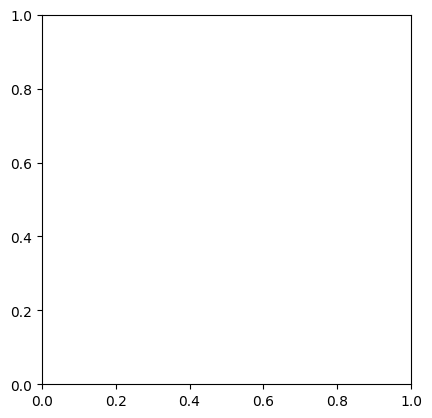

In [32]:
import pandas as pd

data = train.values

plt.imshow(data, cmap='hot')
plt.colorbar()
plt.show()

<Axes: >

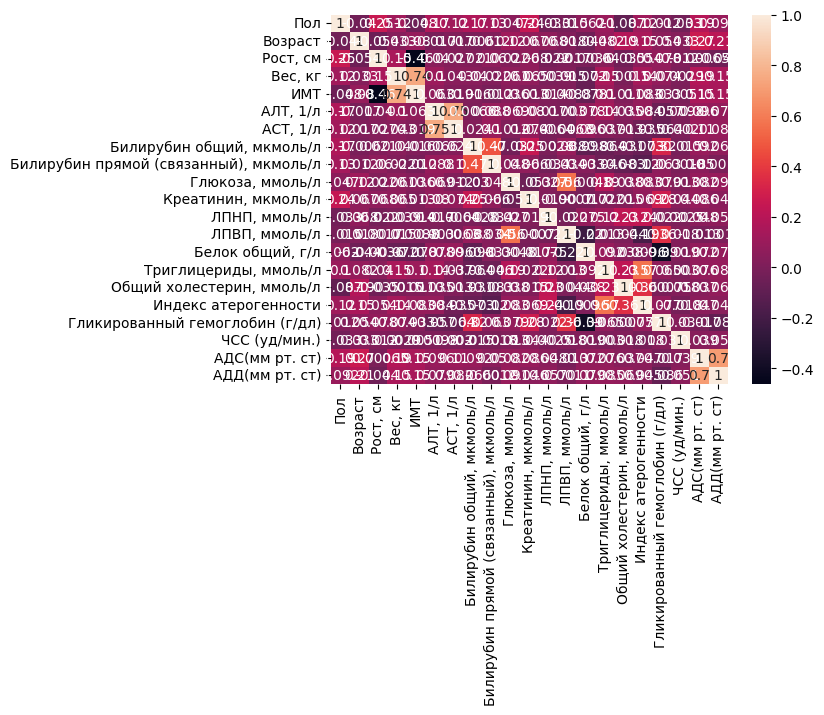

In [40]:
train_for_map = train.drop(columns = ['Классификация', 'Заболевание'])  #удаляем категориальные столбцы для вывода тепловой карты
sns.heatmap(train_for_map.corr(), annot = True)

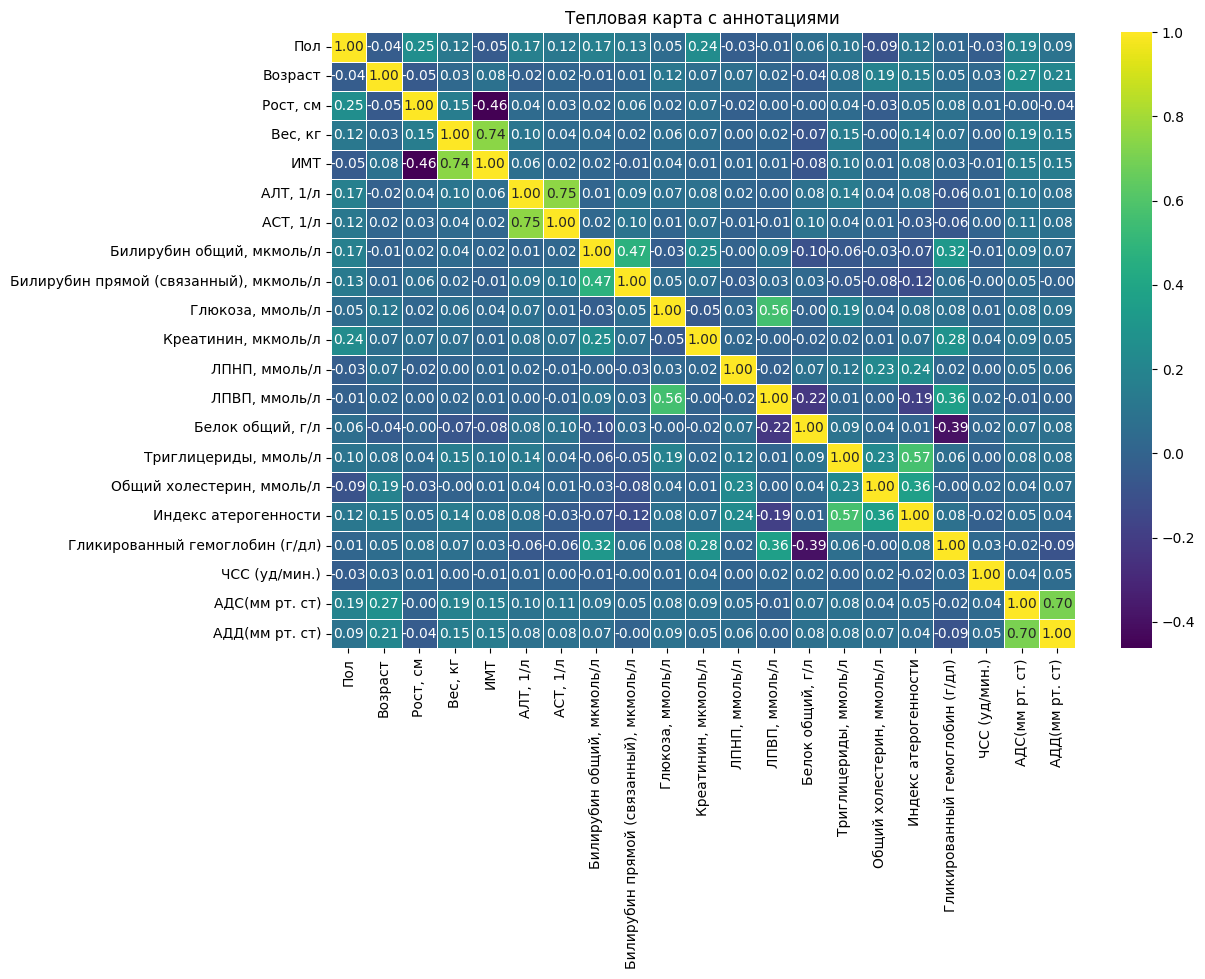

In [43]:
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.heatmap(train_for_map.corr(), annot=True, cmap='viridis', fmt='.2f', linewidths=0.5)
plt.title('Тепловая карта с аннотациями')
plt.show()

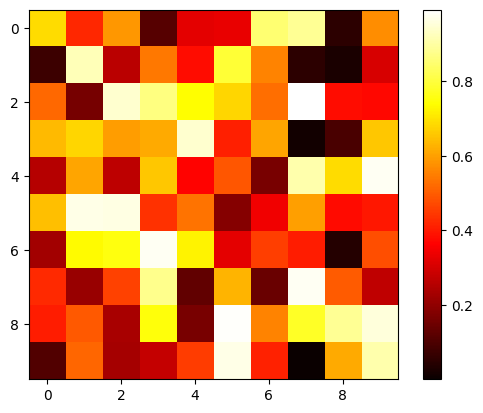

In [54]:
import numpy as np
import matplotlib.pyplot as plt

heat_distribution = np.random.rand(10, 10)

plt.imshow(heat_distribution, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.show()

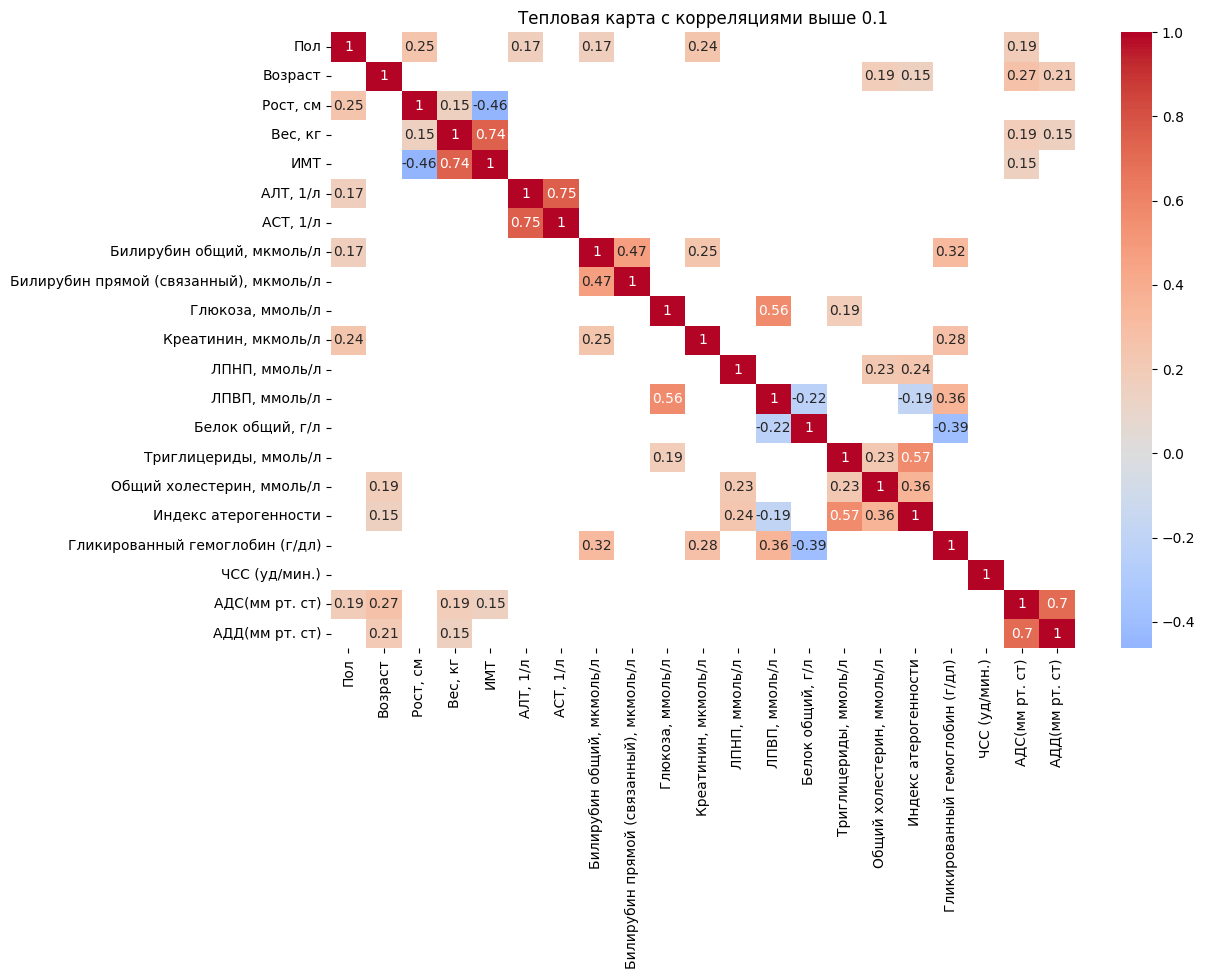

In [60]:
def filter_correlation_matrix(train_for_map, threshold):
    corr_matrix = train_for_map.corr()
    filtered_matrix = corr_matrix.where(np.abs(corr_matrix) > threshold)
    return filtered_matrix

# Пример использования
plt.figure(figsize=(12, 8))
filtered_train_for_map = filter_correlation_matrix(train_for_map, 0.15)
sns.heatmap(filtered_train_for_map, annot=True, cmap='coolwarm', center=0)
plt.title('Тепловая карта с корреляциями выше 0.1')
plt.show()

<Axes: >

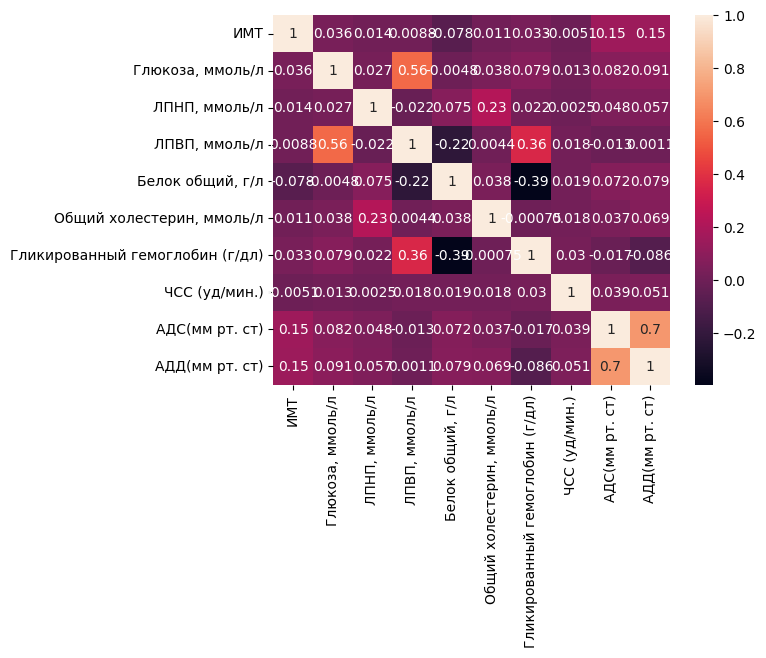

In [41]:
train_for_map_1 = train.drop(columns = ['Классификация', 'Заболевание', 'Пол', 'Возраст','Рост, см','Вес, кг','Билирубин общий, мкмоль/л','Билирубин прямой (связанный), мкмоль/л', 'Триглицериды, ммоль/л', 'Индекс атерогенности', 'Креатинин, мкмоль/л', 'АЛТ, 1/л', 'АСТ, 1/л'])  #удаляем категориальные столбцы для вывода тепловой карты
sns.heatmap(train_for_map_1.corr(), annot = True)